# Iris dataset

In [38]:
!pip install scikit-learn
!pip install pandas
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp312-cp312-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 7.1 MB/s eta 0:00:01
   ----------- ---------------------------- 2.4/8.1 MB 6.7 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.1 MB 7.9 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 8.3 MB/s eta 0:00:00
Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl (223 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [4]:
data = datasets.load_iris()

In [9]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [23]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

In [29]:
df['sepal length (cm)'].value_counts()

sepal length (cm)
5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
6.4     7
5.5     7
5.8     7
4.9     6
6.0     6
5.4     6
5.6     6
6.1     6
6.5     5
4.8     5
7.7     4
6.9     4
4.6     4
5.2     4
6.2     4
4.4     3
7.2     3
5.9     3
6.8     3
4.7     2
6.6     2
4.3     1
7.0     1
5.3     1
4.5     1
7.1     1
7.3     1
7.6     1
7.4     1
7.9     1
Name: count, dtype: int64

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

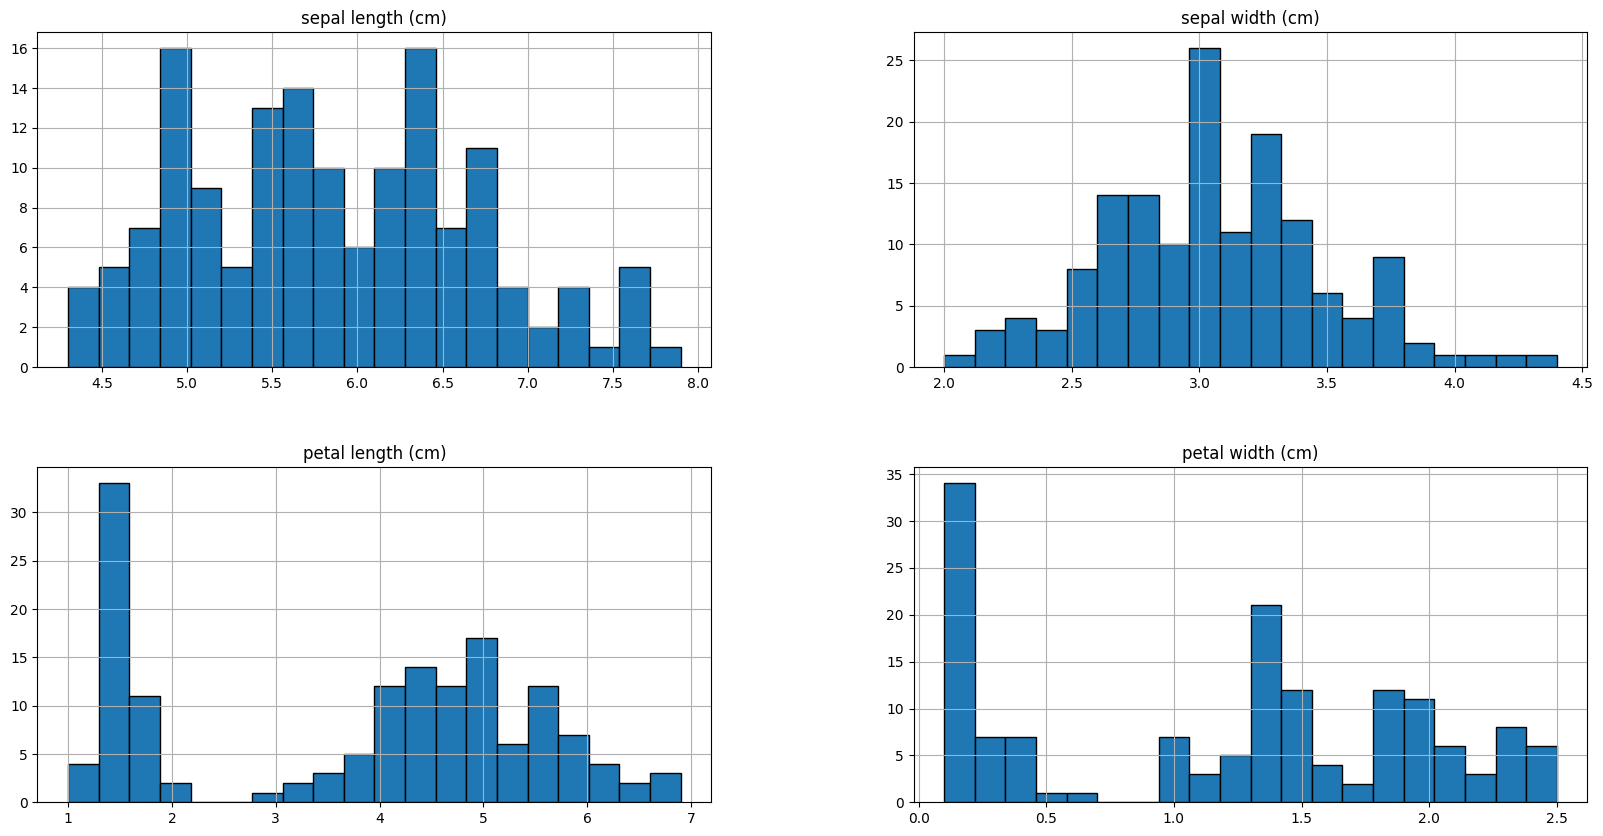

In [51]:
df.hist(figsize=(20,10),bins=20,edgecolor='black')


In [55]:
df['target']=data.target

<Axes: xlabel='target', ylabel='sepal length (cm)'>

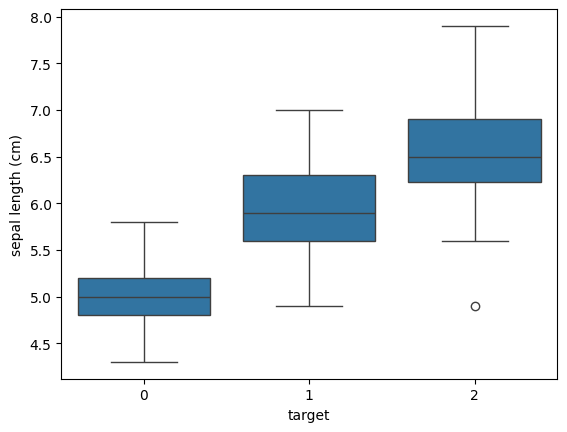

In [56]:
sns.boxplot(x='target',y='sepal length (cm)',data=df)

In [59]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [70]:
feature_columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

X_train,X_test,y_train,y_test = train_test_split(
    df[feature_columns],df['target'],test_size=0.2
)

In [72]:
model = LogisticRegression()

In [73]:
model.fit(X_train,y_train)

LogisticRegression()

In [74]:
y_pred = model.predict(X_test)

In [75]:
y_pred

array([2, 0, 2, 0, 2, 1, 2, 1, 0, 2, 0, 2, 1, 2, 2, 0, 0, 2, 1, 2, 1, 2,
       2, 2, 2, 0, 1, 2, 1, 1])

In [77]:
score = accuracy_score(y_test,y_pred)

In [78]:
score

0.9666666666666667

In [80]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 7,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 14]])

In [81]:
report = classification_report(y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         7\n           1       1.00      0.89      0.94         9\n           2       0.93      1.00      0.97        14\n\n    accuracy                           0.97        30\n   macro avg       0.98      0.96      0.97        30\nweighted avg       0.97      0.97      0.97        30\n'